![Portada](image.png)
# UNIVERSIDAD DEL VALLE DE MÉXICO

## MATERIA: Análisis de Datos Masivos

### UNIDAD 2: Trabajar con datos en Python

#### ACTIVIDAD 2: Análisis de caso

**ESTUDIANTE:** ARTURO NAHUM NIEVES SANTOS  

**DOCENTE:** Dr. Ernesto Bautista Thompson  

**24 DE MARZO DE 2024**


## Análisis de Atletas Olímpicos con Más Medallas de Oro
Los Juegos Olímpicos han sido el escenario de hazañas deportivas y logros extraordinarios desde su inicio en 1896. A lo largo de la historia, más de 35,000 medallas han sido otorgadas a atletas de todo el mundo pero solo unos pocos han logrado destacar como los ganadores de medallas de oro en la historia olímpica.

Este análisis explorará para los juegos de verano:

- ¿Cómo ha evolucionado la participación femenina en comparación con la masculina?

- ¿Quiénes han sido los 30 atletas con mejor desempeño?

- Países con más y menos medallas que el promedio y como se distribuyen alrededor de la desviación estándar.


Un dato interesante a señalar es que en las primeras ediciones de los Juegos Olímpicos, los ganadores recibían medallas de plata y coronas de olivo, pero posteriormente, el Comité Olímpico Internacional (IOC) ajustó la clasificación para reflejar el sistema que actualmente conocemos de oro, plata y bronce.

A través del análisis de datos en Python, utilizaremos técnicas de procesamiento, visualización y exploración de datos para responder estas preguntas y obtener información valiosa sobre la evolución del éxito olímpico en distintas disciplinas y países.

El conjunto de datos nos ofrece 9 datos por cada registro Year, City, Sport, Discipline,Athlete, Country, Gender, Event y Medal desde el año 1896 hasta el 2012.

También disponemos de datos más específicos por cada país en el archivo dictionary que contiene los siguietes datos por registro: Country, Code, Population, GDP per Capita.


# ¿Cómo ha evolucionado la participación femenina en comparación con la masculina?


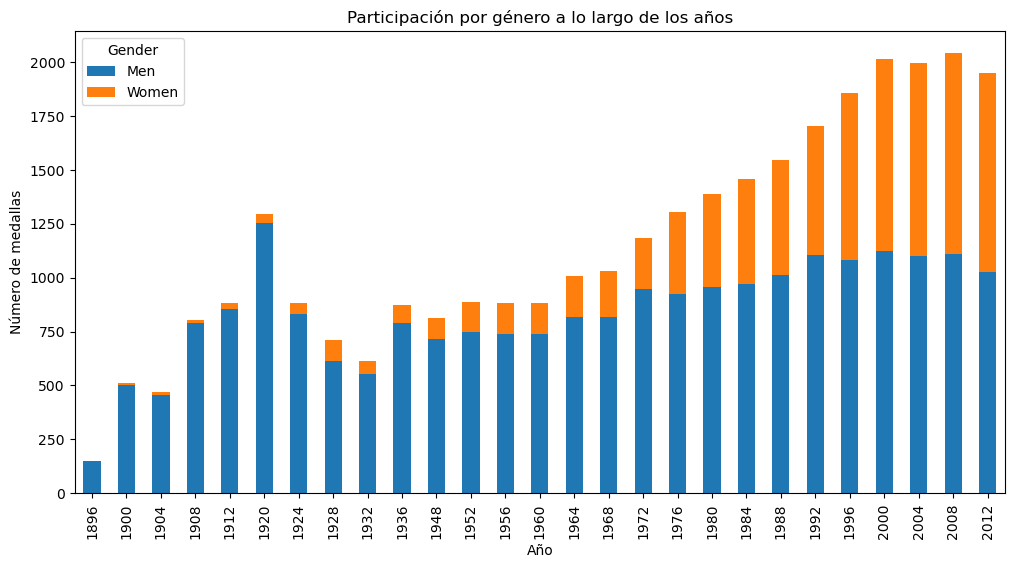

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo CSV
summer_csv = pd.read_csv("olympic-games/summer.csv")
countries_csv = pd.read_csv("olympic-games/dictionary.csv")


genero_por_anio = summer_csv.groupby(['Year', 'Gender'])['Medal'].count().unstack(fill_value=0)
genero_por_anio.plot(kind='bar', stacked=True, figsize=(12, 6), title='Participación por género a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de medallas')
plt.show()


# ¿Quiénes han sido los 30 atletas con mejor desempeño?


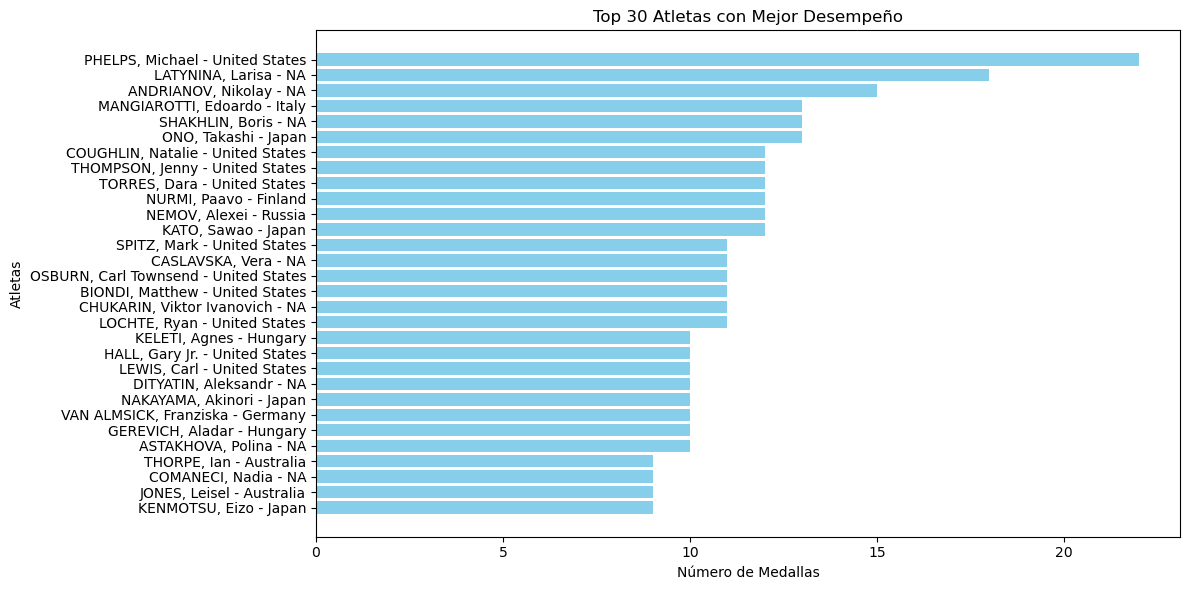

In [50]:
# ¿Quiénes han sido los 30 atletas con mejor desempeño?
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo CSV
countries_csv = pd.read_csv("olympic-games/dictionary.csv")
country_dict = {rows[1]:rows[0] for rows in countries_csv.values}

medallas_por_atleta = summer_csv.groupby(['Athlete','Country'])['Medal'].count().sort_values(ascending=False)

# Obtener los 30 atletas con mejor desempeño
top_30_atletas = medallas_por_atleta.head(30)

# Agregar la nacionalidad usando el diccionario
top_30_atletas = top_30_atletas.reset_index()
top_30_atletas['Nationality'] = top_30_atletas['Country'].map(country_dict).fillna('NA')

#Graficar los top 30 atletas
plt.figure(figsize=(12, 6))


# Concatenate Athlete, Country, and Nationality for the labels
labels = top_30_atletas['Athlete'] + ' - ' +  top_30_atletas['Nationality'] 

# Plot the bar chart
plt.barh(labels, top_30_atletas['Medal'], color='skyblue')
plt.xlabel('Número de Medallas')
plt.ylabel('Atletas')
plt.title('Top 30 Atletas con Mejor Desempeño')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el mejor esté arriba
plt.tight_layout()
plt.show()

# ¿Cuáles han sido los países con más medallas de oro?


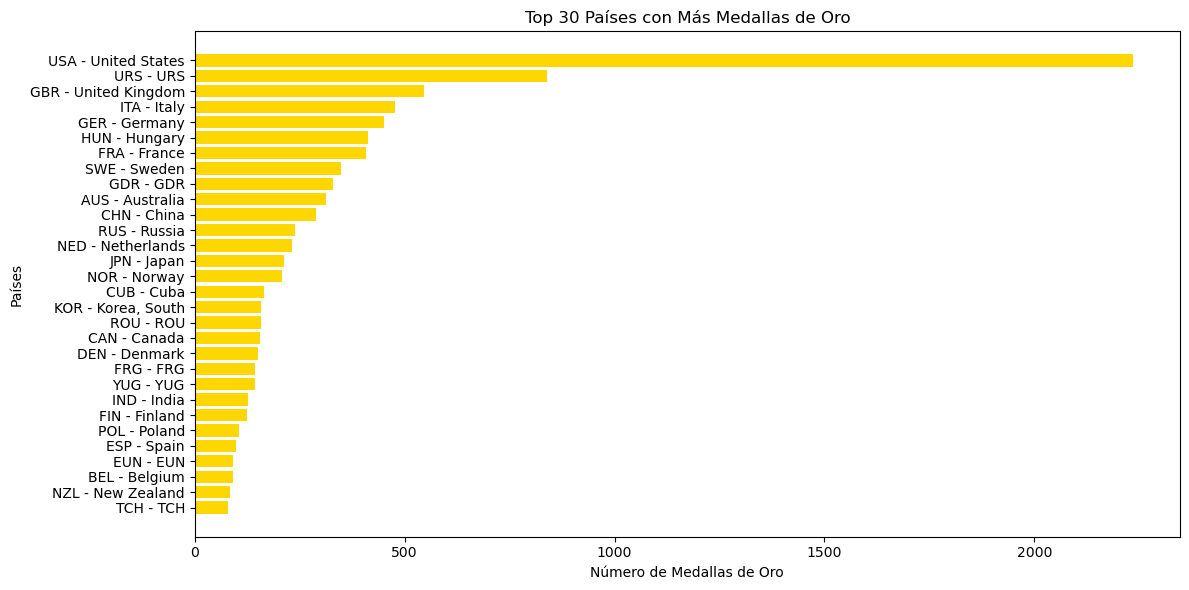

In [51]:
# ¿Cuáles han sido los países con más medallas de oro?
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar solo las medallas de oro
oro_csv = summer_csv[summer_csv['Medal'] == 'Gold']

# Agrupar por país y contar las medallas de oro
medallas_de_oro_por_pais = oro_csv.groupby('Country')['Medal'].count().sort_values(ascending=False)

# Obtener los 30 países con más medallas de oro
top_30_paises = medallas_de_oro_por_pais.head(30).reset_index()

# Agregar la nacionalidad usando el diccionario, si no existe, usar la clave  del país
top_30_paises['Nationality'] = top_30_paises['Country'].map(country_dict).fillna(top_30_paises['Country'])

# Graficar los top 30 países
plt.figure(figsize=(12, 6))

# Concatenar Country y Nationality para las etiquetas
labels = top_30_paises['Country'] + ' - ' + top_30_paises['Nationality']

# Crear el gráfico de barras
plt.barh(labels, top_30_paises['Medal'], color='gold')
plt.xlabel('Número de Medallas de Oro')
plt.ylabel('Países')
plt.title('Top 30 Países con Más Medallas de Oro')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el mejor esté arriba
plt.tight_layout()
plt.show()

# Países con más y menos medallas que el promedio y como se distribuyen alrededor de la desviación estándar.

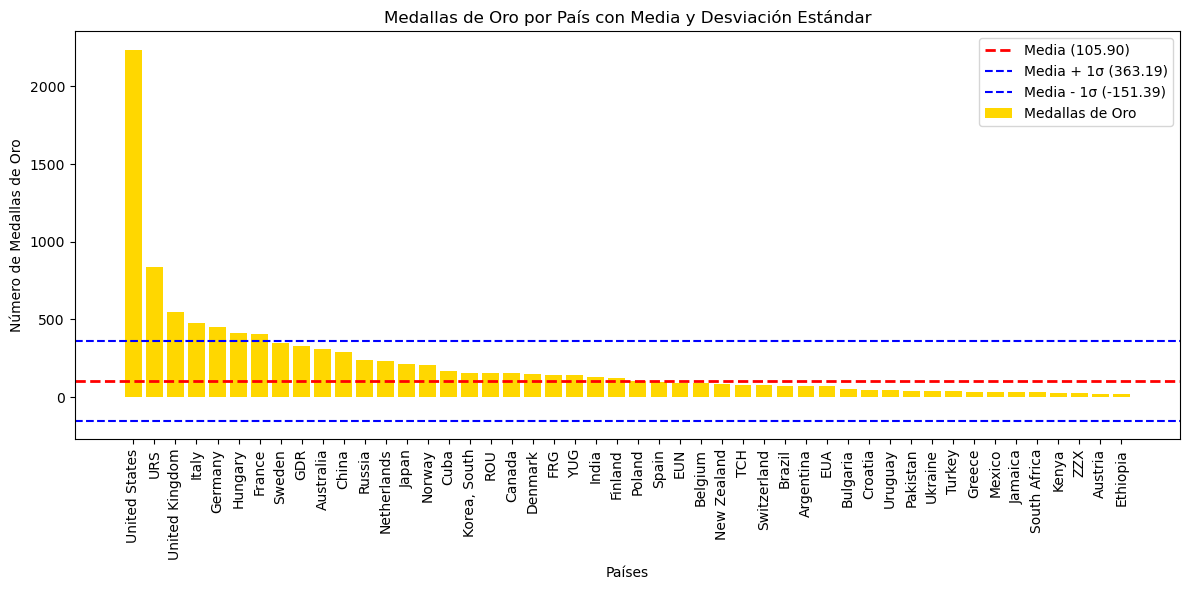

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar solo las medallas de oro
oro_csv = summer_csv[summer_csv['Medal'] == 'Gold']

# Agrupar por país y contar las medallas de oro
medallas_de_oro_por_pais = oro_csv.groupby('Country')['Medal'].count().sort_values(ascending=False)

# Agregar nombre del país usando el diccionario, si no existe, usar la clave  del país
medallas_de_oro_por_pais = medallas_de_oro_por_pais.reset_index()
medallas_de_oro_por_pais['Country_Name'] = medallas_de_oro_por_pais['Country'].map(country_dict).fillna(medallas_de_oro_por_pais['Country'])
medallas_de_oro_por_pais_filtradas = medallas_de_oro_por_pais[medallas_de_oro_por_pais['Medal'] > 20]
# Calcular estadísticas
medallas_array = medallas_de_oro_por_pais['Medal'].values
media = np.mean(medallas_array)
desviacion = np.std(medallas_array)

# Graficar los datos de medallas de oro por país
plt.figure(figsize=(12, 6))
plt.bar(medallas_de_oro_por_pais_filtradas['Country_Name'], medallas_de_oro_por_pais_filtradas['Medal'], color='gold', label='Medallas de Oro')

# Agregar línea de la media
plt.axhline(y=media, color='red', linestyle='--', linewidth=2, label=f'Media ({media:.2f})')

# Agregar líneas de desviación estándar
plt.axhline(y=media + desviacion, color='blue', linestyle='--', linewidth=1.5, label=f'Media + 1σ ({(media + desviacion):.2f})')
plt.axhline(y=media - desviacion, color='blue', linestyle='--', linewidth=1.5, label=f'Media - 1σ ({(media - desviacion):.2f})')

# Personalizar el gráfico
plt.xlabel('Países')
plt.ylabel('Número de Medallas de Oro')
plt.title('Medallas de Oro por País con Media y Desviación Estándar')
plt.xticks(rotation=90)  # Rotar etiquetas de países para mejor visibilidad
plt.legend()
plt.tight_layout()
plt.show()


# Conclusión
Conclusión
A lo largo de la historia de los Juegos Olímpicos, los países más destacados en términos de medallas de oro han sido aquellos con una fuerte tradición deportiva y recursos significativos para invertir en el desarrollo de atletas de alto rendimiento. Entre ellos destacan:

- Estados Unidos, que ha liderado consistentemente en el número de medallas de oro, gracias a su infraestructura deportiva, programas de entrenamiento y una amplia base de atletas.
La Unión Soviética y Rusia, que han demostrado un dominio notable en varias disciplinas, especialmente durante la Guerra Fría, cuando el deporte era una herramienta de prestigio internacional.
- Reino Unido, que ha mantenido un desempeño sólido, especialmente en los últimos años, impulsado por programas como el "UK Sport" y el éxito de los Juegos Olímpicos de Londres 2012.
- Alemania, que ha sido un competidor constante, tanto antes como después de la reunificación, destacándose en deportes como atletismo, ciclismo y deportes de invierno.
- Italia, que ha sobresalido en disciplinas como esgrima, ciclismo y deportes acuáticos.

En general, los datos reflejan cómo el éxito en los Juegos Olímpicos está influenciado no solo por el talento individual de los atletas, sino también por factores como la inversión en deporte, la infraestructura y el contexto histórico y político de cada país.

# Referencias

- Project Jupyter. (s. f.). Installing Jupyter. https://jupyter.org/install

- Olympic Sports and Medals, 1896-2014. (2017, 24 enero). Kaggle. https://www.kaggle.com/datasets/the-guardian/olympic-games

- Pandas | Anaconda.org. (s. f.). https://anaconda.org/anaconda/pandas

- MacTEX - TEX Users Group. (s. f.). https://tug.org/mactex/

- How to Convert ipynb to PDF in Jupyter Notebook | Saturn Cloud Blog. (2023, 7 diciembre). https://saturncloud.io/blog/how-to-convert-ipynb-to-pdf-in-jupyter-notebook/
- A2 Ciencia de Datos. (2022, 16 agosto). El tutorial más importante sobre NumPy  🥸 [Vídeo]. YouTube. https://www.youtube.com/watch?v=cYm3DBG6KfI

- datasciencecamp. (2023, 30 diciembre). Matplotlib | Visualización de datos con Python | Nivel Básico [Vídeo]. YouTube. https://www.youtube.com/watch?v=RdFpsjghKxk



